## Causal Forest (Double Sample Tree) for IHDP
* To run this code, you need to install the following scikit-learn version
```
pip3 install git+https://github.com/kjung/scikit-learn.git --upgrade
```

In [1]:
from __future__ import print_function

import os
import sys
from time import time

import math

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class flags:
    
    # dim = 2
    
    x_dim = 25
    y_dim = 1
    t_dim = 2
    # M = 100
    M = 30
    
    # optimization
    learning_rate = 1e-3 # Base learning rate
    lr_decay = 0.999995 # Learning rate decay, applied every step of the optimization
    
    batch_size = 128 # Batch size during training per GPU
    hidden_size = 2
    
    
FLAGS = flags()
args = FLAGS


In [3]:
def onehot(t,dim):
    
    m_samples = t.shape[0]
    tt = np.zeros([m_samples,dim])
    
    for i in range(m_samples):
        tt[i,np.int(t[i])] = 1
        
    return tt

In [4]:
def eval_pehe(tau_hat,tau):
    return np.sqrt(np.mean(np.square(tau-tau_hat)))

In [5]:
def load_ihdp(trial_id=0,filepath='./data/',istrain=True):
    
    if istrain:
        data_file = filepath+'ihdp_npci_1-1000.train.npz'
    else:
        data_file = filepath+'ihdp_npci_1-1000.test.npz'
        
    data = np.load(data_file)
    
    x = data['x'][:,:,trial_id]
    y = data['yf'][:,trial_id]
    t = data['t'][:,trial_id]
    ycf = data['ycf'][:,trial_id]
    mu0 = data['mu0'][:,trial_id]
    mu1 = data['mu1'][:,trial_id]
    
    return x,y,t,ycf,mu0,mu1

In [29]:
data = np.load('../ihdp_example.npy',allow_pickle=True).item()
X = data['X'] # Confounder proxiess
Y = data['Y'] # Factual outcomes
T = data['T'] # Treatment
Tau = data['Tau']  # Ground truth ITE

n_samples = X.shape[0]

In [30]:
t1_ind = T[:,1]==1   # find which column has the treatment == 1
t0_ind = T[:,0]==1 

n0 = np.sum(t0_ind)
n1 = np.sum(t1_ind)

X0 = X[t0_ind]
X1 = X[t1_ind]

Y0 = Y[t0_ind]
Y1 = Y[t1_ind]

### Training

In [31]:
def show_results():
    
    return ;

In [32]:
from sklearn.ensemble.forest import PropensityForest
from sklearn.ensemble.forest import DoubleSampleForest

In [33]:
T = T[:,1]
Y = Y.reshape([-1,])

In [34]:
B = 2000

dsf_model = DoubleSampleForest(random_state=0,
                        n_estimators=B,
                        min_samples_leaf=1)


In [35]:
tt0 = time()
dsf_model.fit(X=X, y=Y, w=T, subsample_size=50,)
tt1 = time()
print(tt1-tt0)

2.179384708404541


### Evaluation

In [36]:
tau_hat = dsf_model.predict_effect(X)

pehe_ls = eval_pehe(tau_hat, Tau)

print(pehe_ls)

0.8435445235089456


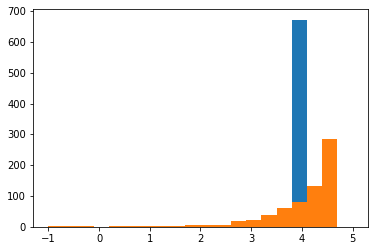

In [37]:
_ = plt.hist(tau_hat,bins=20,range=[-1,5])
_ = plt.hist(Tau,bins=20,range=[-1,5])

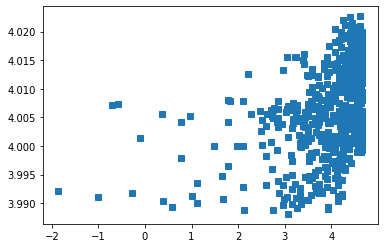

In [38]:
_ = plt.plot(Tau,tau_hat,'s')